<a href="https://colab.research.google.com/github/hasan75/simple_image_recognition_using_CIFAR10/blob/main/simple_image_ricognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Image Ricognition using Python.


In [18]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
#load the data
from keras.datasets import cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

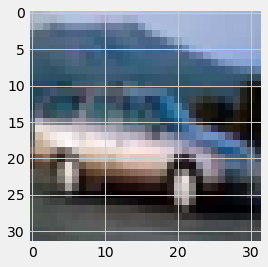

In [20]:
#take a look at the firt image
index = 4
img = plt.imshow(x_train[index])

In [6]:
#get the image lebel & classification
print('the image level: ', y_train[index])

classification = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print the image class
print('the image class: ', classification[y_train[index][0]])

the image level:  [1]
the image class:  automobile


Let's prepare the data for nural network

In [7]:
#convert the lebels into a set of 10 numbbers into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [8]:
#normalize the pixels to be values between 0 and 1
x_train = x_train/ 255
x_test = x_test / 255

In [9]:
#create models architecture
model = Sequential()

#add the firt layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape= (32,32,3)))

#add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu'))

#add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add another flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation= 'relu'))

#add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation= 'relu'))

#add a dropout layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation= 'relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation= 'softmax'))


In [10]:
#COmpile the model
model.compile(loss= 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [11]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs= 10,
                 validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 51s 323ms/step - loss: 2.0107 - accuracy: 0.2387 - val_loss: 1.4780 - val_accuracy: 0.4511
Epoch 2/10
157/157 [==============================] - 50s 319ms/step - loss: 1.4718 - accuracy: 0.4655 - val_loss: 1.3484 - val_accuracy: 0.5063
Epoch 3/10
157/157 [==============================] - 50s 318ms/step - loss: 1.2903 - accuracy: 0.5361 - val_loss: 1.1929 - val_accuracy: 0.5759
Epoch 4/10
157/157 [==============================] - 50s 318ms/step - loss: 1.1753 - accuracy: 0.5838 - val_loss: 1.1056 - val_accuracy: 0.6099
Epoch 5/10
157/157 [==============================] - 50s 318ms/step - loss: 1.0780 - accuracy: 0.6137 - val_loss: 1.0550 - val_accuracy: 0.6241
Epoch 6/10
157/157 [==============================] - 50s 318ms/step - loss: 1.0053 - accuracy: 0.6493 - val_loss: 0.9968 - val_accuracy: 0.6493
Epoch 7/10
157/157 [==============================] - 50s 317ms/step - loss: 0.9288 - accuracy: 0.6685 - val_loss: 0.9911 - val_ac

In [12]:
#evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 14ms/step - loss: 0.9232 - accuracy: 0.6748


0.6747999787330627

Now let's try some image for image recognition

In [21]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving truck.jpg to truck.jpg


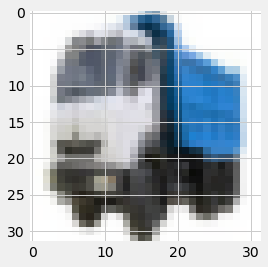

In [22]:
#show the resized image
new_image = plt.imread('truck.jpg')

from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))
img = plt.imshow(resized_image)

truck : 96.38 %
automobile : 3.6 %
cat : 0.01 %
ship : 0.0 %
frog : 0.0 %


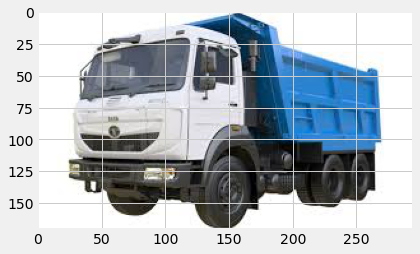

In [23]:
#get the models prediction
predictions = model.predict(np.array([resized_image]))


#short the predictions from least to greartest
list_index = [0,1,2,3,4,5,6,7,8,9]
x= predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
for i in range(5):
  img = plt.imshow(new_image)
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100, 2), '%')
